<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 3: Practical - Logistic Regression <br> <br>
<font color=686880 size=4>
    TAs: Ali Salesi - Alireza Dehghanpour - Arman Malekzadeh
    
____

### Full Name : Pardis Zahraei
### Student Number : 99109777
### Colab Link: https://colab.research.google.com/drive/1_VQM58URGAG8hY4O69j-8ypsfJDRvfi9?usp=sharing
___

## 1. Introduction (10 points)
The datasets consist of several medical predictor(independent) variables and one target (dependent) variable, "Outcome". Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
  * Pregnancies
  * Glucose
  * BloodPressure
  * SkinThickness
  * Insulin
  * BMI
  * DiabetesPedigreeFunction
  * Age


First, we perform some data exploration to get a better understanding of the data. Then, we perform some data preprocessing to prepare the data for the regression model. Finally, we train a regression model to predict the outcome.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://github.com/sharif-ml/sharif-ml.github.io/raw/main/assignments/diabet-train.csv

--2023-04-28 14:46:41--  https://github.com/sharif-ml/sharif-ml.github.io/raw/main/assignments/diabet-train.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sharif-ml/sharif-ml.github.io/main/assignments/diabet-train.csv [following]
--2023-04-28 14:46:41--  https://raw.githubusercontent.com/sharif-ml/sharif-ml.github.io/main/assignments/diabet-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20859 (20K) [text/plain]
Saving to: ‘diabet-train.csv.1’

diabet-train.csv.1  100%[===================>]  20.37K  --.-KB/s    in 0.001s  

2023-04-28 14:46:41 (23.5 MB/s) - ‘diabet-train.csv.1’ s

TODO: Load the dataset as a dataframe. Then, check for any null values. Remove the rows containing them. Finally, display the first 10 rows.

In [ ]:
df = pd.read_csv('diabet-train.csv')
print(df.isnull().sum())
df.dropna(inplace=True)
print(df.head(10))

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5 

TODO: Calculate the mean, standard deviation, min and max value for each column.

In [ ]:
stats = df.describe()
print(stats)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   688.000000  688.000000     688.000000     688.000000  688.000000   
mean      3.818314  120.399709      68.816860      20.437500   79.325581   
std       3.359206   32.335016      19.412061      15.998604  115.199903   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  116.000000      71.000000      23.000000   36.000000   
75%       6.000000  140.000000      80.000000      32.000000  126.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  688.000000                688.000000  688.000000  688.000000  
mean    31.862500                  0.475683   33.138081    0.343023  
std      7.945238                  0.338147   11.828338    0.475065  
min      0.000000                  

## 2. Data Exploration (10 points)
In this section, we perform some data exploration to get a better understanding of the data.
First, we draw heatmaps to see the correlation between the features.
Then we draw pairplots to see the distribution of the features.

TODO: Draw a heatmap based on the correlation between the features (hint: you can use `seaborn`)

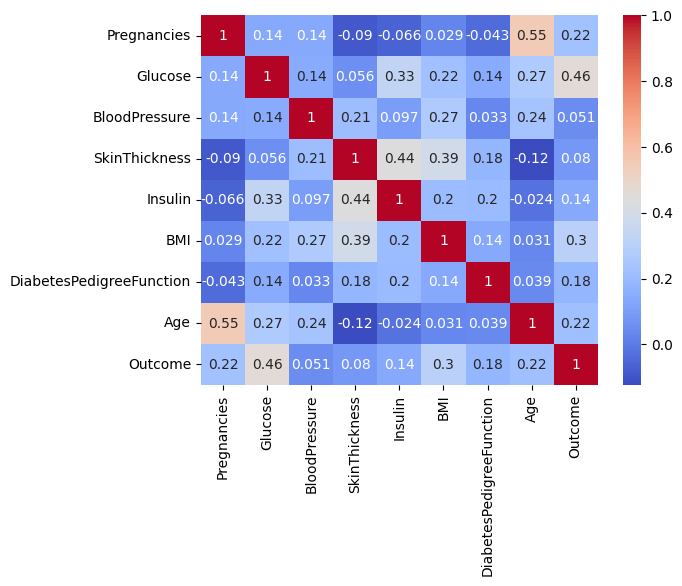

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

TODO: Draw the pairplot associated with the dataframe using `seaborn`.

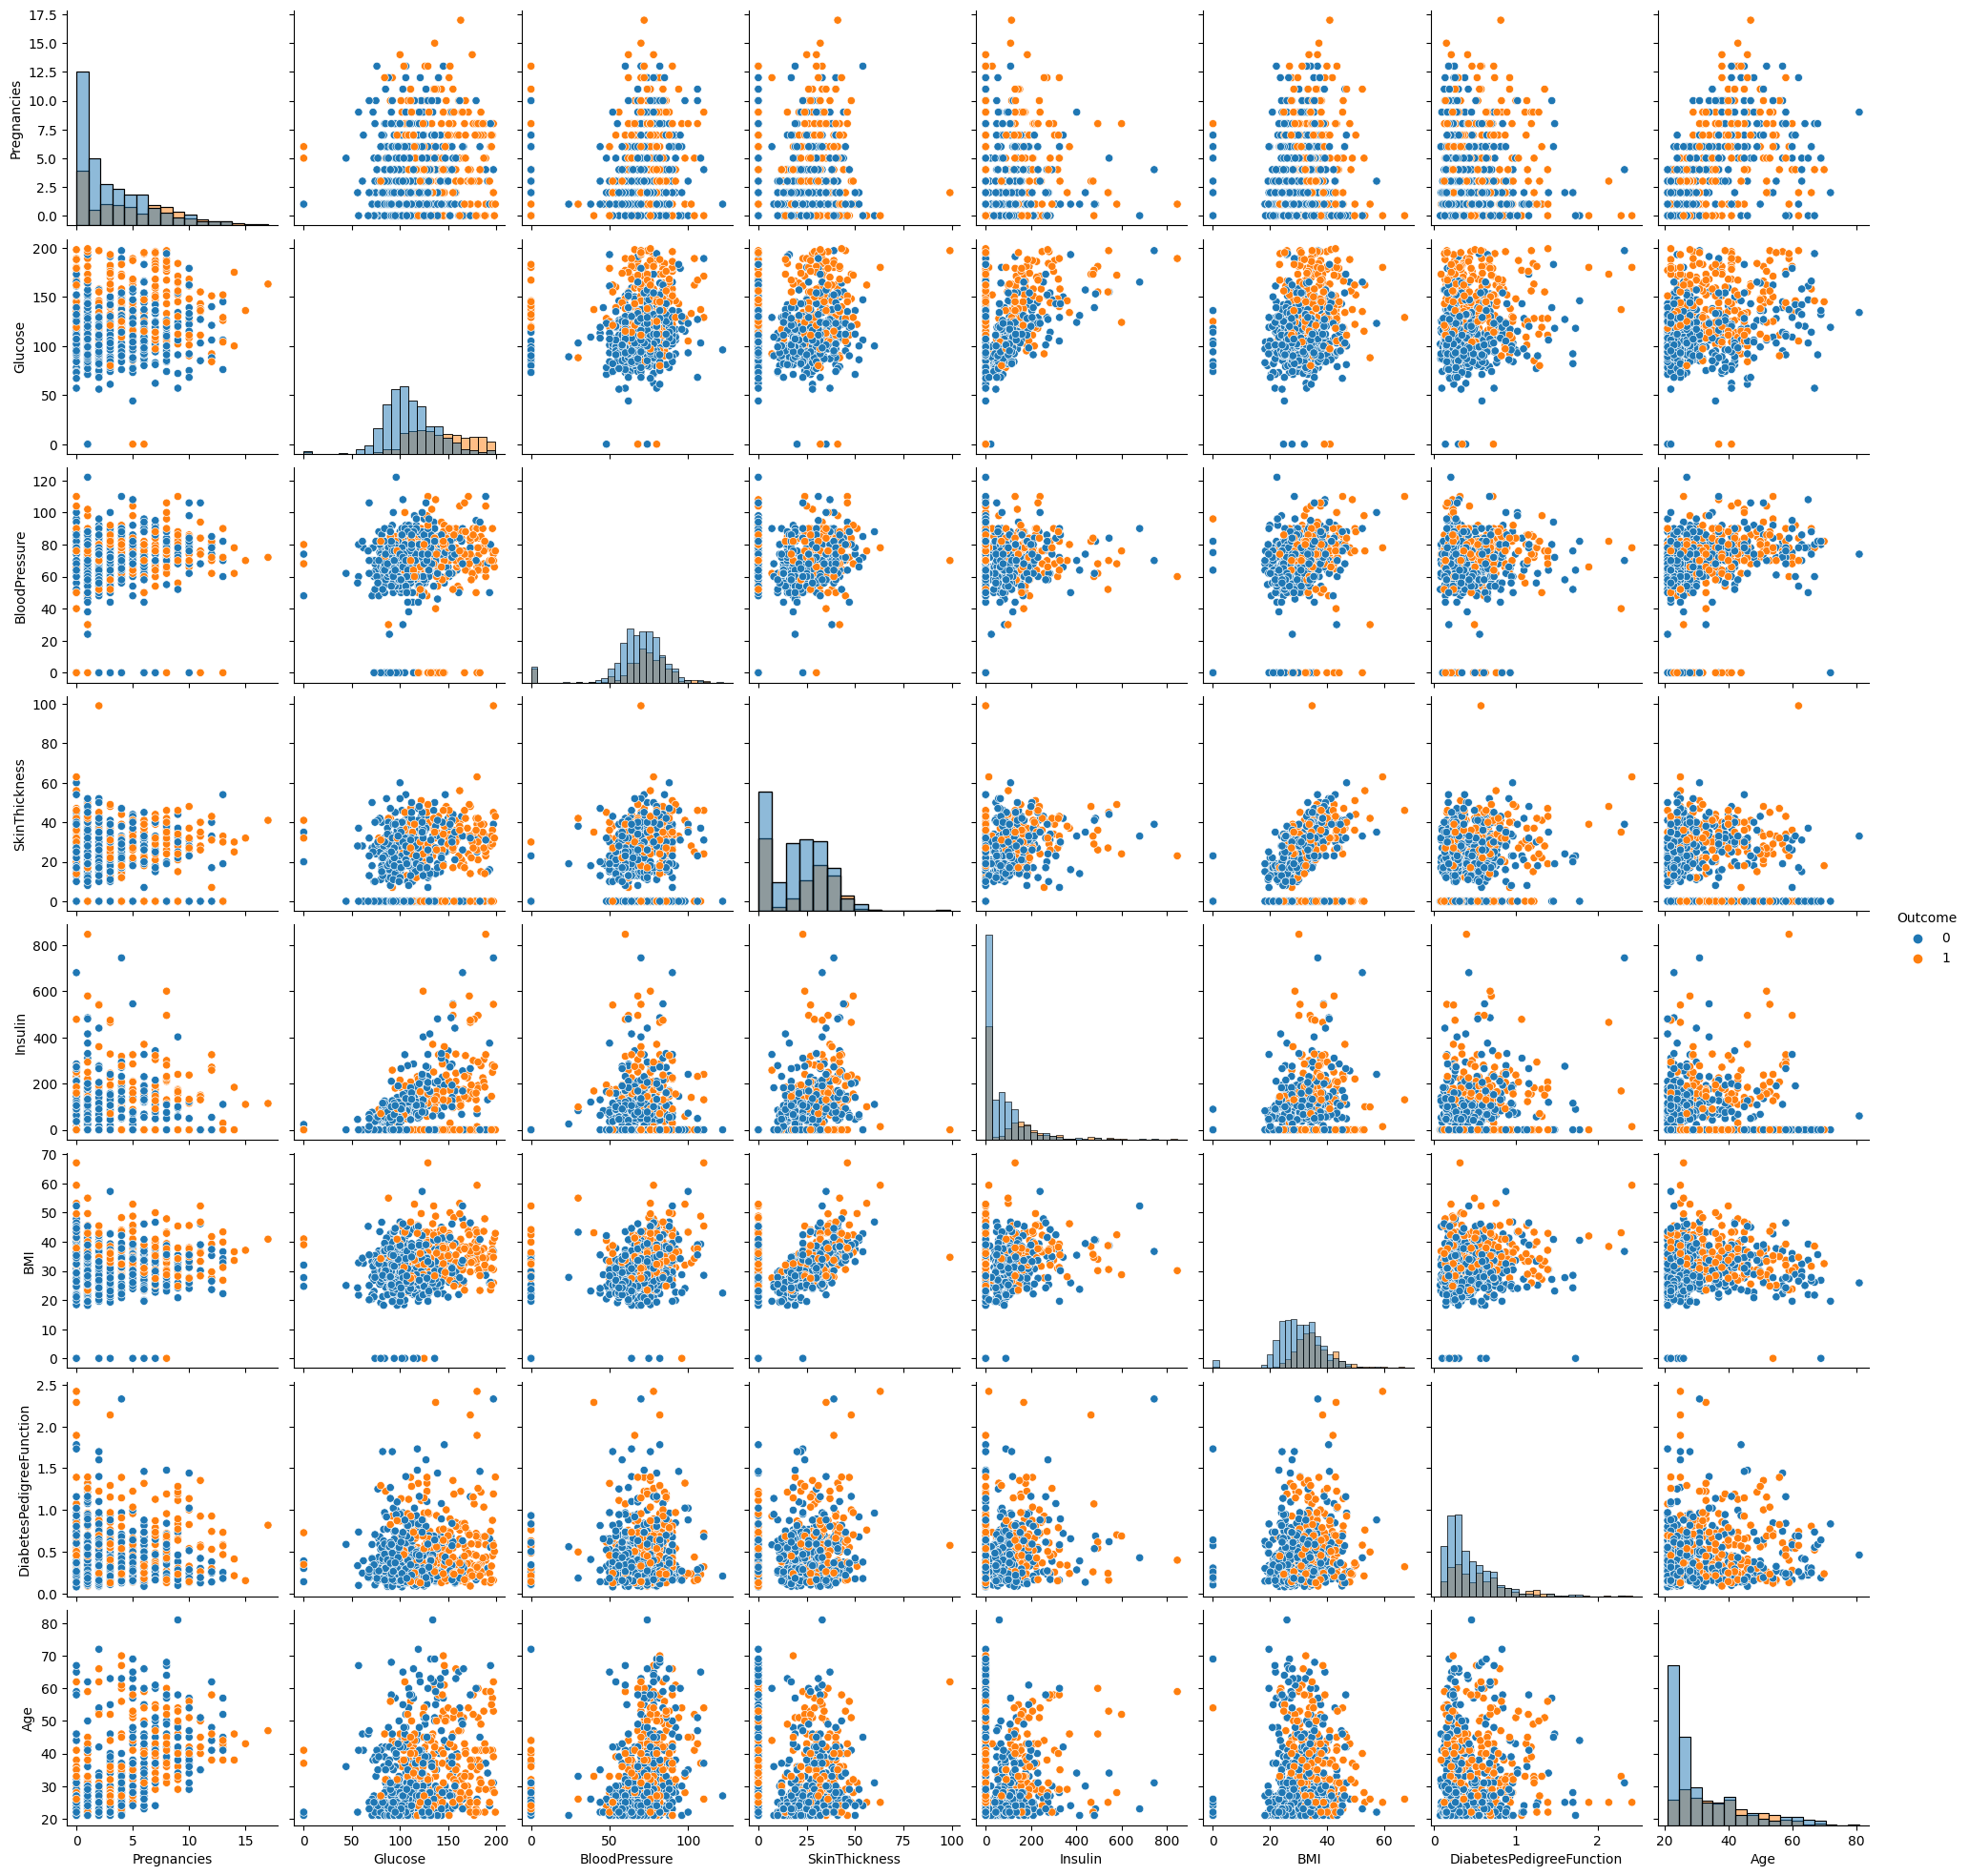

In [ ]:
sns.pairplot(df, hue='Outcome', diag_kind='hist')
plt.show()

## 3. SKLearn Regression Model (15 points)

### 3.1 Logistic Regression
In this section, we perform logistic regression to predict the outcome.
Then we draw confusion matrix to see the accuracy of the model.

TODO: Train a logistic regression model using `sklearn`. Use 20% of the data for the testing phase, and the remaining for the training phase.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7246376811594203


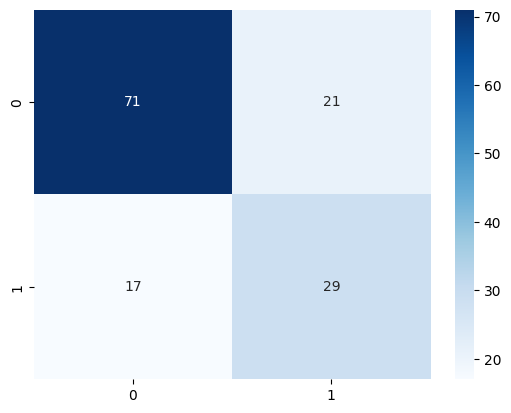

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
print('Accuracy:', accuracy)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

## 4. Custom Regression Model (30 points)
First, we define base model for regression model.

### 4.1 Gradient Descent Logistic Regression Model




In [ ]:
## DO NOT CHANGE THE CONTENTS OF THIS CELL

from abc import ABC, abstractmethod


class BaseModel(ABC):
    def __init__(self, n_features):
        self.N = n_features
        self.beta = np.zeros((self.N+1,))

    @abstractmethod
    def fit(self, X_train, y_train):
        raise NotImplementedError('must override fit')

    @abstractmethod
    def predict(self, X_test):
        raise NotImplementedError('must override predict')

In [ ]:
class GDModel(BaseModel):
    def __init__(self, n_features, max_iter=50000, lr=0.0001, tol=1e-6, momentum=0.9):
        super().__init__(n_features)
        self.max_iter = max_iter
        self.lr = lr
        self.tol = tol
        self.momentum = momentum

    @abstractmethod
    def loss(self, X, y):
        raise NotImplementedError("must override loss")

    @abstractmethod
    def loss_derivative(self, X, y):
        raise NotImplementedError("must override loss derivative")

    def fit(self, X_train, y_train):
        X_train_new = np.concatenate(
            (X_train, np.ones((X_train.shape[0], 1))), axis=1)
        last_loss = 0
        momentum = 0
        for _ in range(self.max_iter):
            loss = self.loss(X_train_new, y_train)
            if abs(loss - last_loss) < self.tol:
                break
            last_loss = loss
            dl = self.loss_derivative(X_train_new, y_train) + self.momentum * momentum
            momentum = dl
            self.beta = self.beta - self.lr * dl

TODO: Imeplement the Logistic Regression model. For this class, the only things you have to change are the definitions of the following functions: `loss`, `loss_derivative`, and `predict`. 
<br>
Note: Some basic explanations about the concept of "gradient descent" will be given to you in a TA session very soon. However, completing this task doesn't necessarily depend on being familiar with that concept.

In [ ]:
class GDLogisticRegression(GDModel):
    def __init__(self, n_features, **kwargs):
        super().__init__(n_features, **kwargs)
        self.beta = np.random.normal(0, 1/np.sqrt(self.N), (self.N+1))

    def loss(self, X, y):
        z = np.dot(X, self.beta)
        return np.mean(np.log(1 + np.exp(-y*z)))

    def loss_derivative(self, X, y):
        z = np.dot(X, self.beta)
        return -np.dot(X.T, y/(1+np.exp(y*z)))/X.shape[0]

    def predict(self, X):
        z = np.dot(np.concatenate((X, np.ones((X.shape[0], 1))), axis=1), self.beta)
        return 1/(1+np.exp(-z))

TODO: Implement the Logistic Regression Model. This time, use Pytorch!

In [ ]:
# DO NOT CHANGE THE CONTENT OF THIS CELL

import torch

class GDTorchModel(BaseModel):
    def __init__(self, n_features, max_iter=50000, init_lr=0.0001):
        super().__init__(n_features)
        self.max_iter = max_iter
        self.init_lr = init_lr
        self.optimizer = None
        self.scheduler = None

    @abstractmethod
    def loss(self, X, y):
        raise NotImplementedError("must override loss")

    def fit(self, X_train, Y_train):
        for _ in range(self.max_iter):
            loss = self.loss(X_train, Y_train)
            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()
            self.scheduler.step(loss)

Note: Just change the definitions of `loss` and `predict`.

In [ ]:
class GDTorchLogisticRegression(GDTorchModel):
    def __init__(self, n_features, **kwargs):
        super().__init__(n_features, **kwargs)
        self.beta = torch.randn(self.N+1, requires_grad=True)
        self.optimizer = torch.optim.Adam([self.beta], lr=0.01)
        self.scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, 'min', patience=1000, factor=0.5)

    def loss(self, X, y):
        criterion = torch.nn.BCELoss()
        y_pred = torch.sigmoid(torch.matmul(X, self.beta[1:]) + self.beta[0])
        return criterion(y_pred, y)

    def predict(self, X):
        y_pred = torch.sigmoid(torch.matmul(X, self.beta[1:]) + self.beta[0])
        return y_pred

TODO: Predict the "Outcome" for the testing samples using all of the models (the one you trained using `sklearn` and the other ones for which you used your own code).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)
GDTorch_model = GDTorchLogisticRegression(n_features=X_train.shape[1])
GDTorch_model.fit(torch.Tensor(X_train.values), torch.Tensor(y_train.values))
y_pred_torch = GDTorch_model.predict(torch.Tensor(X_test.values))
y_pred_binary_torch = (y_pred_torch > 0.5).int().numpy()
from sklearn.metrics import accuracy_score
print("Accuracy torch:", accuracy_score(y_test, y_pred_binary_torch))
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
sklearn_predictions = lr.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy of sk model:", accuracy_score(y_test, sklearn_predictions))
gd_mod = GDLogisticRegression(n_features=X_train.shape[1])
gd_mod.fit(X_train, y_train)
y_pred_gd = gd_mod.predict(X_test)
y_pred_binary_gd = (y_pred_gd >= 0.5).astype(int)
from sklearn.metrics import accuracy_score
print("Accuracy of GD model:", accuracy_score(y_test, y_pred_binary_gd))

Accuracy torch: 0.7246376811594203
Accuracy of sk model: 0.7246376811594203
Accuracy of GD model: 0.3333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluation (20 points)

TODO: Calculate `precision`, `recall`, and `f1-score`, and the `confusion_matrix` using your own code. Do this for the predictions given by both of the models.

In [ ]:
class classification_full_report():
    def __init__(self, y_true, y_pred):
        '''
        Parameters:
            y_true : 1d array-like, or label indicator array
                    Ground truth (correct) target values.
            y_pred : 1d array-like, or label indicator array
                    Estimated targets as returned by a classifier.

        '''
        self.y_true = y_true
        self.y_pred = y_pred

    def f1_score(self):
        '''
        Returns:
            f1: the f1-score calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        unique_labels = np.unique(self.y_true)
        f1_scores = []
        for label in unique_labels:
            true_positives = np.sum((self.y_true == label) & (self.y_pred == label))
            false_positives = np.sum((self.y_true != label) & (self.y_pred == label))
            false_negatives = np.sum((self.y_true == label) & (self.y_pred != label))
            precision = true_positives / (true_positives + false_positives)
            recall = true_positives / (true_positives + false_negatives)
            f1_scores.append(2 * (precision * recall) / (precision + recall))
        macro_f1 = np.mean(f1_scores)
        return macro_f1

    def precision(self):
        '''
        Returns:
            precision: the precision calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        unique_labels = np.unique(self.y_true)
        precisions = []
        for label in unique_labels:
            true_positives = np.sum((self.y_true == label) & (self.y_pred == label))
            false_positives = np.sum((self.y_true != label) & (self.y_pred == label))
            precision = true_positives / (true_positives + false_positives)
            precisions.append(precision)
        macro_precision = np.mean(precisions)
        return macro_precision

    def recall(self):
        '''
        Returns:
            precision: the precision calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        unique_labels = np.unique(self.y_true)
        recalls = []
        for label in unique_labels:
            true_positives = np.sum((self.y_true == label) & (self.y_pred == label))
            false_negatives = np.sum((self.y_true == label) & (self.y_pred != label))
            recall = true_positives / (true_positives + false_negatives)
            recalls.append(recall)
        macro_recall = np.mean(recalls)
        return macro_recall

    def confusion_matrix(self):
        '''
        Returns:
            precision: the confusion matrix calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        classes = np.unique(self.y_true)
        n_classes = len(classes)
        cm = np.zeros((n_classes, n_classes), dtype=int)
        for i, true_class in enumerate(classes):
            mask_true = self.y_true == true_class
            for j, pred_class in enumerate(classes):
                mask_pred = self.y_pred == pred_class
                cm[i, j] = np.count_nonzero(mask_true & mask_pred)
        return cm

In [ ]:
report_gd = classification_full_report(y_test, y_pred_binary_gd)
cm_gd = report_gd.confusion_matrix()
print("Confusion matrix for gd:")
print(cm_gd)
rec_gd = report_gd.recall()
print("recall for gd:")
print(rec_gd)
prec_gd = report_gd.precision()
print("precision for gd:")
print(prec_gd)
f_gd = report_gd.f1_score()
print("f1_score for gd:")
print(f_gd)

report_sk = classification_full_report(y_test, sklearn_predictions)
cm_sk = report_sk.confusion_matrix()
print("Confusion matrix for sk:")
print(cm_sk)
rec_sk = report_sk.recall()
print("recall for sk:")
print(rec_sk)
prec_sk = report_sk.precision()
print("precision for sk:")
print(prec_sk)
f_sk = report_sk.f1_score()
print("f1_score for sk:")
print(f_sk)

report_torch = classification_full_report(y_test, y_pred_binary_torch)
cm_torch = report_torch.confusion_matrix()
print("Confusion matrix for torch:")
print(cm_torch)
rec_torch = report_torch.recall()
print("recall for torch:")
print(rec_torch)
prec_torch = report_torch.precision()
print("precision for torch:")
print(prec_torch)
f_torch = report_torch.f1_score()
print("f1_score for torch:")
print(f_torch)




Confusion matrix for gd:
[[ 0 92]
 [ 0 46]]
recall for gd:
0.5
precision for gd:
nan
f1_score for gd:
nan
Confusion matrix for sk:
[[71 21]
 [17 29]]
recall for sk:
0.7010869565217391
precision for sk:
0.6934090909090909
f1_score for sk:
0.6965277777777777
Confusion matrix for torch:
[[69 23]
 [15 31]]
recall for torch:
0.7119565217391304
precision for torch:
0.6977513227513228
f1_score for torch:
0.7020454545454546


<ipython-input-70-a05bebb5d7ca>:45: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positives / (true_positives + false_positives)
<ipython-input-70-a05bebb5d7ca>:27: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positives / (true_positives + false_positives)


# Finding the right Threshold (15 points)

TODO: Plot the "Precision-Recall Curve".

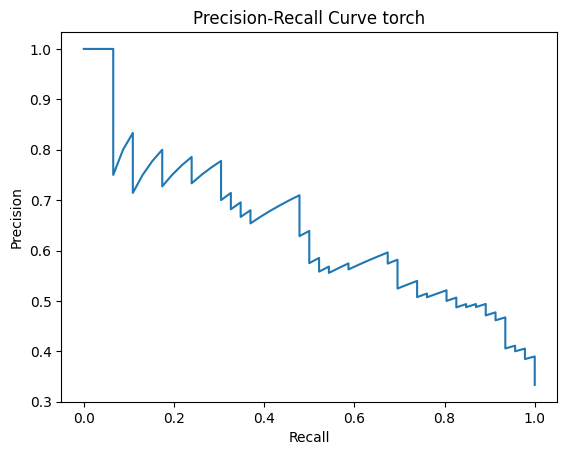

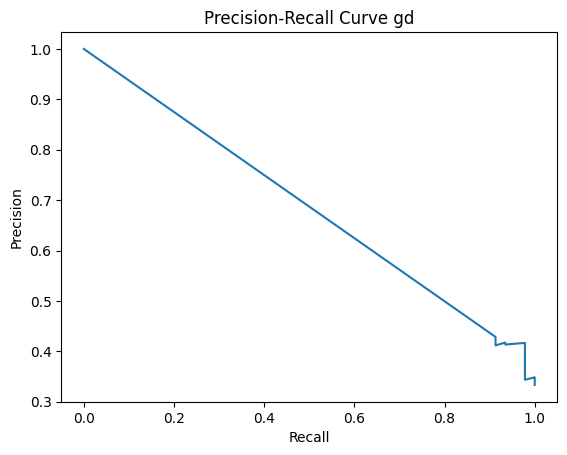

In [ ]:
from sklearn.metrics import precision_recall_curve
precisionto, recallto, thresholdsto = precision_recall_curve(y_test, y_pred_torch.detach().numpy())
plt.plot(recallto, precisionto)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve torch')
plt.show()

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_gd)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve gd')
plt.show()

TODO: Based on the above curve, calculate the threshold minimizing the absolute difference between precision and recall.

In [ ]:
abs_diff = abs(precisionto - recallto)
idx = np.argmin(abs_diff) 
print("Threshold that minimizes the absolute difference between precision and recall:", thresholdsto[idx])

Threshold that minimizes the absolute difference between precision and recall: 0.5528549


In [ ]:
abs_diff = abs(precision - recall)
idx = np.argmin(abs_diff) 
print("Threshold that minimizes the absolute difference between precision and recall:", thresholds[idx])

Threshold that minimizes the absolute difference between precision and recall: 1.0


In [ ]:
y_pred_binary_torch = (y_pred_torch > 0.5).int().numpy()
from sklearn.metrics import accuracy_score
print("Accuracy torch:", accuracy_score(y_test, y_pred_binary_torch))

Accuracy torch: 0.7246376811594203


In [ ]:
from sklearn.metrics import accuracy_score
final_ac=0
final_i=0
for i in range(0, 1001, 1):
    value = i / 1000.0
    y_pred_binary_torch = (y_pred_torch > value).int().numpy()
    ac=accuracy_score(y_test, y_pred_binary_torch)
    if(ac>final_ac):
      final_ac=ac
      final_i=value
# Print the accuracy score on the testing data
print(final_ac)
print(final_i)

0.7536231884057971
0.668


# Kaggle Competition

In [ ]:
df = pd.read_csv('diabet-train.csv')
df.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)
GDTorch_model = GDTorchLogisticRegression(n_features=X_train.shape[1])
GDTorch_model.fit(torch.Tensor(X_train.values), torch.Tensor(y_train.values))
y_pred_torch = GDTorch_model.predict(torch.Tensor(X_test.values))
y_pred_binary_torch = (y_pred_torch >  0.6).int().numpy()
from sklearn.metrics import accuracy_score
print("Accuracy torch:", accuracy_score(y_test, y_pred_binary_torch))

df = pd.read_csv('assignment3-test-data.csv')
df.dropna(inplace=True)
df = df.drop(["ID"], axis=1)
x = df.values
y_pred_torch = GDTorch_model.predict(torch.Tensor(x))
y_pred_binary_torch = (y_pred_torch >  0.6).int().numpy()
id_arr = np.arange(1, 81)
df = pd.DataFrame({'Outcome': y_pred_binary_torch, 'ID': id_arr})
df.to_csv('output.csv', index=False)


Accuracy torch: 0.717391304347826


In [ ]:
#run by sklearn model
df = pd.read_csv('diabet-train.csv')
df.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear', max_iter = 2000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

print(model_score)
df = pd.read_csv('assignment3-test-data.csv')
df.dropna(inplace=True)
df = df.drop(["ID"], axis=1)
x = df.values
y_pred_torch = model.predict(x)

id_arr = np.arange(1, 81)
df = pd.DataFrame({'Outcome': y_pred_torch, 'ID': id_arr})
df.to_csv('output.csv', index=False)


0.7318840579710145


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# torch
# improve by using torch

df = pd.read_csv('diabet-train.csv')
df.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)
GDTorch_model = GDTorchLogisticRegression(n_features=X_train.shape[1])
GDTorch_model.fit(torch.Tensor(X_train.values), torch.Tensor(y_train.values))
y_pred_torch = GDTorch_model.predict(torch.Tensor(X_test.values))
y_pred_binary_torch = (y_pred_torch >  0.668).int().numpy()
from sklearn.metrics import accuracy_score
print("Accuracy torch:", accuracy_score(y_test, y_pred_binary_torch))

df = pd.read_csv('assignment3-test-data.csv')
df.dropna(inplace=True)
df = df.drop(["ID"], axis=1)
x = df.values
y_pred_torch = GDTorch_model.predict(torch.Tensor(x))
y_pred_binary_torch = (y_pred_torch >  0.668).int().numpy()
id_arr = np.arange(1, 81)
df = pd.DataFrame({'Outcome': y_pred_binary_torch, 'ID': id_arr})
df.to_csv('output.csv', index=False)


Accuracy torch: 0.7536231884057971


In [ ]:
# torch modified
# improve by normalising and torch
# its strange how it didnt improve

df = pd.read_csv('diabet-train.csv')
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df.dropna(inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)
GDTorch_model = GDTorchLogisticRegression(n_features=X_train.shape[1])
GDTorch_model.fit(torch.Tensor(X_train.values), torch.Tensor(y_train.values))
y_pred_torch = GDTorch_model.predict(torch.Tensor(X_test.values))
y_pred_binary_torch = (y_pred_torch >  0.5).int().numpy()
from sklearn.metrics import accuracy_score


df = pd.read_csv('assignment3-test-data.csv')
df.dropna(inplace=True)
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())

df = df.drop(["ID"], axis=1)
x = df.values
y_pred_torch = GDTorch_model.predict(torch.Tensor(x))
y_pred_binary_torch = (y_pred_torch >  0.5).int().numpy()
id_arr = np.arange(1, 81)
df = pd.DataFrame({'Outcome': y_pred_binary_torch, 'ID': id_arr})
df.to_csv('output30.csv', index=False)


from best to worst it torch > torch modified > sklearn
MY final upload in Kaggle is using torch 

Link: https://www.kaggle.com/t/1013891ffec9479dadd5023e56c04f30